In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [3]:
digit = load_digits()
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

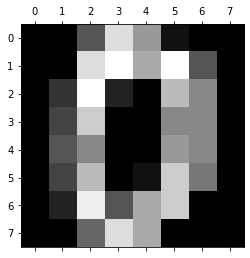

In [5]:
plt.matshow(digit.images[0])
plt.gray()
plt.show()

In [6]:
df = pd.DataFrame(digit.data,
                 columns = digit.feature_names)
df['target'] = digit.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [7]:
X = df.drop('target', axis=1)
y = df.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [14]:
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [15]:
model.score(X_test, y_test)

0.9722222222222222

In [16]:
clf = GridSearchCV(model,
                  {'C' : [1, 10, 20],
                  'kernel':['rbf', 'linear']},
                  cv=5,
                  return_train_score=False)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'linear']})

In [17]:
clf.score(X_test, y_test)

0.9833333333333333

In [18]:
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [20]:
clf.cv_results_

{'mean_fit_time': array([0.06420126, 0.03379807, 0.05879831, 0.03539901, 0.05700016,
        0.03399949]),
 'std_fit_time': array([0.00074964, 0.00074765, 0.00213553, 0.00286963, 0.00167474,
        0.00141506]),
 'mean_score_time': array([0.01919913, 0.00999966, 0.01720395, 0.01039977, 0.01740022,
        0.01099973]),
 'std_score_time': array([3.99113186e-04, 6.67572021e-07, 3.98145881e-04, 4.89438871e-04,
        4.90217389e-04, 1.99971199e-03]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20

In [21]:
d = pd.DataFrame(clf.cv_results_)
d

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.064201,0.000750,0.019199,3.991132e-04,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.989583,0.982639,0.989547,0.982578,0.996516,0.988173,0.005204,3
1,0.033798,0.000748,0.010000,6.675720e-07,1,linear,"{'C': 1, 'kernel': 'linear'}",0.982639,0.982639,0.986063,0.975610,0.979094,0.981209,0.003563,4
2,0.058798,0.002136,0.017204,3.981459e-04,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.993056,0.986111,0.993031,0.982578,0.996516,0.990258,0.005116,1
3,0.035399,0.002870,0.010400,4.894389e-04,10,linear,"{'C': 10, 'kernel': 'linear'}",0.982639,0.982639,0.986063,0.975610,0.979094,0.981209,0.003563,4
4,0.057000,0.001675,0.017400,4.902174e-04,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.993056,0.986111,0.993031,0.982578,0.996516,0.990258,0.005116,1
5,0.033999,0.001415,0.011000,1.999712e-03,20,linear,"{'C': 20, 'kernel': 'linear'}",0.982639,0.982639,0.986063,0.975610,0.979094,0.981209,0.003563,4


In [22]:
d[['param_C', 'params','mean_test_score']]

,param_C,params,mean_test_score
0,1,"{'C': 1, 'kernel': 'rbf'}",0.988173
1,1,"{'C': 1, 'kernel': 'linear'}",0.981209
2,10,"{'C': 10, 'kernel': 'rbf'}",0.990258
3,10,"{'C': 10, 'kernel': 'linear'}",0.981209
4,20,"{'C': 20, 'kernel': 'rbf'}",0.990258
5,20,"{'C': 20, 'kernel': 'linear'}",0.981209


In [29]:
rs = RandomizedSearchCV(model,
                       {'C':[1,10,20],
                       'kernel':['rbf', 'linear']},
                       cv=5,
                       return_train_score=False,
                       n_iter=2)
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=2,
                   param_distributions={'C': [1, 10, 20],
                                        'kernel': ['rbf', 'linear']})

In [30]:
rs.score(X_test, y_test)

0.9833333333333333

In [31]:
rs.best_params_

{'kernel': 'rbf', 'C': 20}

In [32]:
rs.cv_results_

{'mean_fit_time': array([0.0574223 , 0.05600905]),
 'std_fit_time': array([0.00638756, 0.00205155]),
 'mean_score_time': array([0.01640043, 0.01547451]),
 'std_score_time': array([0.00195594, 0.00131267]),
 'param_kernel': masked_array(data=['rbf', 'rbf'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[20, 10],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'rbf', 'C': 20}, {'kernel': 'rbf', 'C': 10}],
 'split0_test_score': array([0.99305556, 0.99305556]),
 'split1_test_score': array([0.98611111, 0.98611111]),
 'split2_test_score': array([0.99303136, 0.99303136]),
 'split3_test_score': array([0.9825784, 0.9825784]),
 'split4_test_score': array([0.99651568, 0.99651568]),
 'mean_test_score': array([0.99025842, 0.99025842]),
 'std_test_score': array([0.00511565, 0.00511565]),
 'rank_test_score': array([1, 1])}

In [33]:
rs_df = pd.DataFrame(rs.cv_results_)
rs_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.057422,0.006388,0.016400,0.001956,rbf,20,"{'kernel': 'rbf', 'C': 20}",0.993056,0.986111,0.993031,0.982578,0.996516,0.990258,0.005116,1
1,0.056009,0.002052,0.015475,0.001313,rbf,10,"{'kernel': 'rbf', 'C': 10}",0.993056,0.986111,0.993031,0.982578,0.996516,0.990258,0.005116,1


In [34]:
rs_df[['param_C', 'params', 'mean_test_score']]

,param_C,params,mean_test_score
0,20,"{'kernel': 'rbf', 'C': 20}",0.990258
1,10,"{'kernel': 'rbf', 'C': 10}",0.990258


In [46]:
model_params = {
    'svm': {
        'model':svm.SVC(),
        'params': {
            'kernel':['rbf', 'linear'],
            'C':[1, 10, 20]
        }

            },
            'log_reg' : {
            'model' : LogisticRegression(),
            'params' : {
                'solver':['newtoncg', 'liblinear', 'sag', 'saga'],
                'max_iter':[100, 200, 300]
            }
                },
    
                'rfc' : {
                'model': RandomForestClassifier(),
                'params': {
                    'n_estimators' : [50, 100, 200]
                    
                }
                    },
    

                
                'GNB': {
                    'model': GaussianNB(),
                    'params': {
                        'var_smoothing':[1e-10, 1e-20, 1e-30]
                    }
                },
            'DT' : {
                'model' : DecisionTreeClassifier(),
                'params' : {
                    'criterion' : ['entropy', 'log_loss'],
                    'max_features': [50, 100, 200]
                }
            }
    
    }


In [47]:
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model' : model_name,
        'best_score': clf.best_score_,
        'best_params':clf.best_params_
    })

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 433, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got newtoncg.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\User\anaconda3\lib\s

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the

In [48]:
scores

[{'model': 'svm',
  'best_score': 0.9902584204413472,
  'best_params': {'C': 10, 'kernel': 'rbf'}},
 {'model': 'log_reg',
  'best_score': 0.9665868176538908,
  'best_params': {'max_iter': 200, 'solver': 'saga'}},
 {'model': 'rfc',
  'best_score': 0.976333236546651,
  'best_params': {'n_estimators': 100}},
 {'model': 'GNB',
  'best_score': 0.8295102593883081,
  'best_params': {'var_smoothing': 1e-10}},
 {'model': 'DT',
  'best_score': 0.8461938637243515,
  'best_params': {'criterion': 'entropy', 'max_features': 50}}]

In [49]:
model_df = pd.DataFrame(scores)
model_df

,model,best_score,best_params
0,svm,0.990258,"{'C': 10, 'kernel': 'rbf'}"
1,log_reg,0.966587,"{'max_iter': 200, 'solver': 'saga'}"
2,rfc,0.976333,{'n_estimators': 100}
3,GNB,0.829510,{'var_smoothing': 1e-10}
4,DT,0.846194,"{'criterion': 'entropy', 'max_features': 50}"
